In [34]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [35]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [36]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [37]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [38]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with = engine)
# reflect the tables
print(Base)

<class 'sqlalchemy.ext.automap.Base'>


In [39]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [40]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [42]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date
print(type(most_recent_date))


<class 'str'>


Date one year ago: 2016-08-23


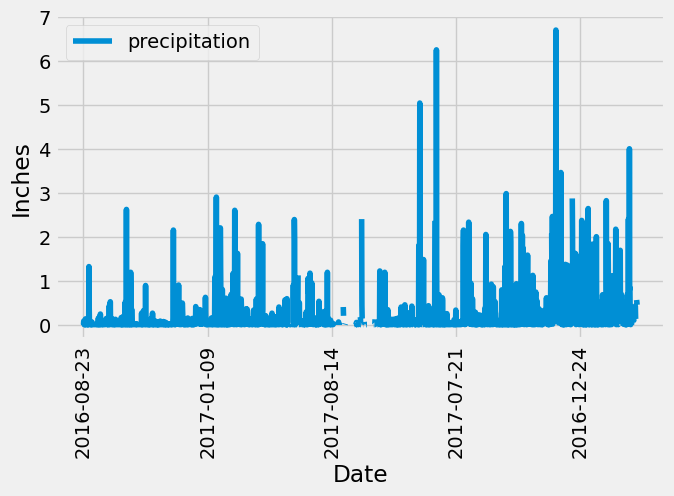

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
most_recent_date = pd.to_datetime(most_recent_date, format='%Y-%m-%d')

one_year_ago = most_recent_date - dt.timedelta(days=365)
print(f"Date one year ago: {one_year_ago.date()}")
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago.date()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=["date", "precipitation"])

# Sort the dataframe by date
precip_df.set_index("date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot=90, xlabel='Date', ylabel='Inches', figsize=(7,4))
plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).scalar()
print(f"Total number of stations: {total_stations}")


Total number of stations: 9


In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
# List the stations and their counts in descending order.
for station, count in active_stations:
    print(f'Station: {station}, Count: {count}')


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'
most_active_stats = (session.query(
    func.min(measurement.tobs), 
    func.max(measurement.tobs), 
    func.avg(measurement.tobs)
    )
    .filter(measurement.station == most_active_station).all())

min_temp, max_temp, avg_temp = most_active_stats[0]

print(f'Lowest Temperature: {min_temp}, Highest Temperature: {max_temp}, Average Temperature: {avg_temp:.2f}.')


Lowest Temperature: 54.0, Highest Temperature: 85.0, Average Temperature: 71.66.


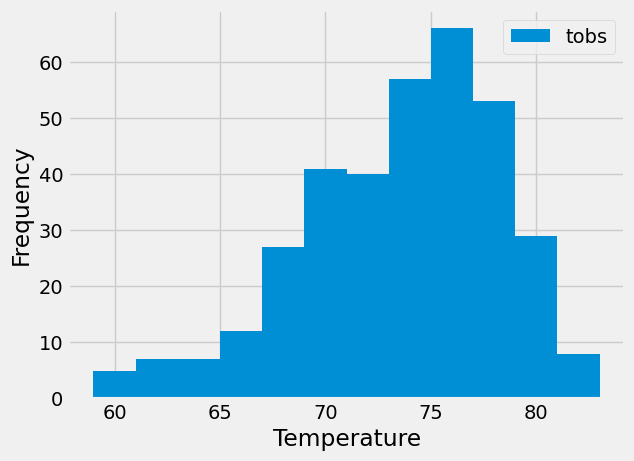

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs).\
    filter(measurement.station == most_active_station).\
    filter(measurement.date >= one_year_ago.date()).all()
tobs_data_df = pd.DataFrame(tobs_data)
tobs_data_df.head()

tobs_plot = tobs_data_df.plot.hist(xlabel = 'Temperature', bins = 12)

# Close Session

In [49]:
# Close Session
session.close()